In [2]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Selecionar o conjunto de dados

Trabalharemos com um conjunto de dados de 150 flores diferentes, ou 50 de cada uma das três diferentes espécies de íris. (*Iris setosa*, *Iris versicolor*, and *Iris virginica*).


![tut4_iris](https://i.imgur.com/RcxYYBA.png)

#### Carregar e examinar os dados.

Cada linha do conjunto de dados corresponde a uma flor diferente. Existem quatro medidas: o comprimento e a largura da sépala, junto com o comprimento e a largura da pétala. Também monitoramos as espécies correspondentes.

In [3]:
# Arquivo de contendo o conjunto de dados
dados = 'iris.csv'

# Ler a base de dados
iris_data = pd.read_csv(dados, index_col = 'Id')

# Apresenta as 5 primeiras linhas da base de dados
iris_data.head(5)

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


#### Histogramas

Digamos que gostaríamos de criar um **histograma** para ver como o comprimento das pétalas varia nas flores da íris. Podemos fazer isso com o comando `sns.distplot`.

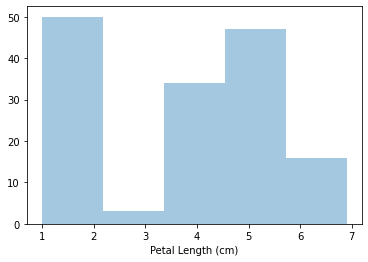

In [4]:
# Histograma 
sns.distplot(a = iris_data['Petal Length (cm)'], kde = False);

Personalizamos o comportamento do comando com duas informações adicionais:
- `a =` escolhe a coluna que gostaríamos de plotar (neste caso, escolhemos `'Petal Length (cm)'`).
- `kde = False` é algo que sempre forneceremos ao criar um histograma, pois deixá-lo de fora criará um gráfico ligeiramente diferente.

#### Gráficos de Densidade

O próximo tipo de gráfico é um gráfico de **estimativa de densidade do kernel (KDE)**. Caso você não esteja familiarizado com os gráficos do KDE, você pode pensar nisso como um histograma suavizado.

Para fazer um gráfico do KDE, usamos o comando `sns.kdeplot`. Definir `shade = True` colore a área abaixo da curva (e` data = `tem funcionalidade idêntica como quando fizemos o histograma acima).

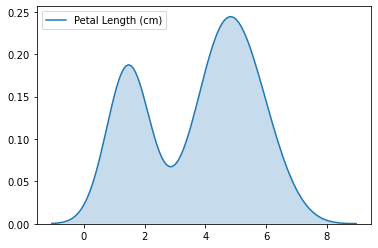

In [5]:
# Gráfico KDE
sns.kdeplot(data = iris_data['Petal Length (cm)'], shade = True);

# 2D KDE plots

Não estamos restritos a uma única coluna ao criar um gráfico do KDE. Podemos criar um gráfico KDE **bidimensional (2D)** com o comando `sns.jointplot`.

No gráfico abaixo, o código de cores nos mostra a probabilidade de vermos diferentes combinações de largura da sépala e comprimento da pétala, onde as partes mais escuras da figura são mais prováveis.

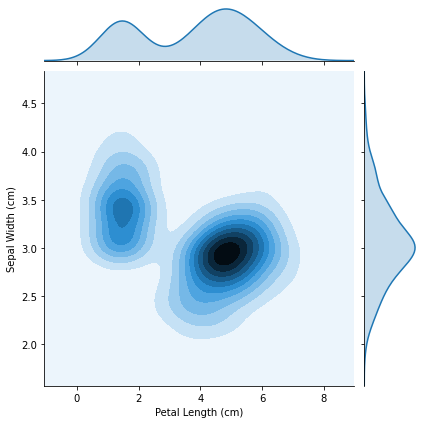

In [18]:
# Gráfico 2D KDE
sns.jointplot(x = iris_data['Petal Length (cm)'], y = iris_data['Sepal Width (cm)'], kind = 'kde');

Observe que, além do gráfico 2D do KDE no centro,
- a curva no topo da figura é um gráfico do KDE para os dados no eixo x (neste caso, `iris_data['Petal Length (cm)']`), e
- a curva à direita da figura é um gráfico do KDE para os dados no eixo y (neste caso, `iris_data['Sepal Width (cm)']`).

#### Gráficos Codificados por Cores

Para a próxima parte do tutorial, criaremos gráficos para entender as diferenças entre as espécies. Para fazer isso, começamos dividindo o conjunto de dados em três arquivos separados, um para cada espécie.

In [7]:
# Ler arquivos contendo o conjunto de dados
iris_set = 'iris_setosa.csv'
iris_ver = 'iris_versicolor.csv'
iris_vir = 'iris_virginica.csv'

# Carregar base de dados
iris_set_data = pd.read_csv(iris_set, index_col = 'Id')
iris_ver_data = pd.read_csv(iris_ver, index_col = 'Id')
iris_vir_data = pd.read_csv(iris_vir, index_col = 'Id')

# Apresenta as 5 primeiras linhas da base de dados
iris_ver_data.head(5)

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
51,7.0,3.2,4.7,1.4,Iris-versicolor
52,6.4,3.2,4.5,1.5,Iris-versicolor
53,6.9,3.1,4.9,1.5,Iris-versicolor
54,5.5,2.3,4.0,1.3,Iris-versicolor
55,6.5,2.8,4.6,1.5,Iris-versicolor


Na célula de código abaixo, criamos um histograma diferente para cada espécie usando o comando `sns.distplot` (como acima) três vezes. Usamos `label =` para definir como cada histograma aparecerá na legenda.

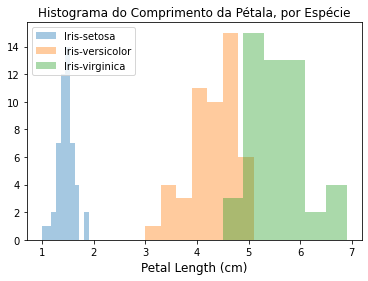

In [16]:
# Histograma para cada espécie
sns.distplot(a = iris_set_data['Petal Length (cm)'], label = 'Iris-setosa', kde = False)
sns.distplot(a = iris_ver_data['Petal Length (cm)'], label = 'Iris-versicolor', kde = False)
sns.distplot(a = iris_vir_data['Petal Length (cm)'], label = 'Iris-virginica', kde = False)

# Adicionar título ao gráfico
plt.title('Histograma do Comprimento da Pétala, por Espécie')

# Legenda
plt.legend()

# Adicionar rótulo ao eixo x
plt.xlabel('Petal Length (cm)', fontsize = 'large');

Nesse caso, a legenda não aparece automaticamente no gráfico. Para forçar a exibição (para qualquer gráfico), podemos sempre usar `plt.legend ()`.

Também podemos criar um gráfico do KDE para cada espécie usando `sns.kdeplot` (como acima). Novamente, `label =` é usado para definir os valores na legenda.

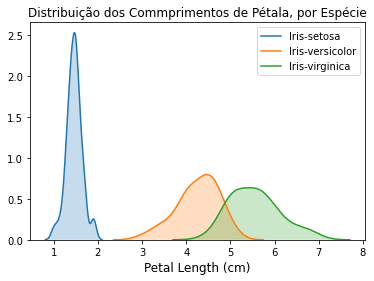

In [15]:
# Gráficos KDE para cada espécie
sns.kdeplot(data = iris_set_data['Petal Length (cm)'], label = 'Iris-setosa', shade = True)
sns.kdeplot(data = iris_ver_data['Petal Length (cm)'], label = 'Iris-versicolor', shade = True)
sns.kdeplot(data = iris_vir_data['Petal Length (cm)'], label = 'Iris-virginica', shade = True)

# Adicionar título ao gráfico
plt.title('Distribuição dos Commprimentos de Pétala, por Espécie')

# Adicionar rótulo ao eixo x
plt.xlabel('Petal Length (cm)', fontsize = 'large');

Um padrão interessante que pode ser visto nas parcelas é que as plantas parecem pertencer a um de dois grupos, onde _Iris versicolor_ e _Iris virginica_ parecem ter valores semelhantes para o comprimento da pétala, enquanto _Iris setosa_ pertence a uma categoria por si só.

Na verdade, de acordo com este conjunto de dados, podemos até ser capazes de classificar qualquer planta de íris como *Iris setosa* (em oposição a *Iris versicolor* ou *Iris virginica*) apenas olhando para o comprimento da pétala: se o comprimento da pétala de uma flor de íris tem menos de 2 cm, é mais provável que seja *Iris setosa*!